<a href="https://colab.research.google.com/github/heruu-1/bike_analysis/blob/main/Proyek_Analisis_Data_Muhammad_Heru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-Sharing
- **Nama:** Muhammad Heru
- **Email:** herum556@gmail.com
- **ID Dicoding:** heruu_mhmd

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana cuaca memengaruhi permintaan rental sepeda?
- Pertanyaan 2 : Bagaimana tren pengguna sepeda pada saat hari kerja?
- Pertanyaan 3 : Pada jam berapakah kebutuhan pengguna rental sepeda paling tinggi pada hari kerja?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df=pd.read_csv('day.csv')
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df=pd.read_csv('hour.csv')
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Dataset Dictionary**

- **instant**: Indeks rekaman (record index)
- **dteday**: Tanggal (date)
- **season**: Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall)
- **yr**: Tahun (0: 2011, 1: 2012)
- **mnth**: Bulan (1 hingga 12)
- **hr**: Jam (0 hingga 23)
- **holiday**: Apakah hari tersebut merupakan hari libur atau bukan (diperoleh dari [http://dchr.dc.gov/page/holiday-schedule](http://dchr.dc.gov/page/holiday-schedule))
- **weekday**: Hari dalam seminggu
- **workingday**: Apakah hari tersebut merupakan hari kerja atau bukan (1: Hari kerja, 0: Akhir pekan atau hari libur)
- **weathersit**: Situasi cuaca:
  - 1: Cerah, Beberapa awan, Sebagian berawan, Sebagian berawan
  - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
  - 3: Salju ringan, Hujan ringan + Petir + Awan pecah, Hujan ringan + Awan pecah
  - 4: Hujan lebat + Hujan es + Petir + Kabut, Salju + Kabut
- **temp**: Suhu yang dinormalisasi dalam Celsius (dibagi dengan nilai maksimum 41)
- **atemp**: Suhu terasa yang dinormalisasi dalam Celsius (dibagi dengan nilai maksimum 50)
- **hum**: Kelembapan yang dinormalisasi (dibagi dengan nilai maksimum 100)
- **windspeed**: Kecepatan angin yang dinormalisasi dalam mil per jam (dibagi dengan nilai maksimum 67)
- **casual**: Jumlah penyewaan sepeda oleh pengguna non-terdaftar (casual users)
- **registered**: Jumlah penyewaan sepeda oleh pengguna terdaftar (registered users)
- **cnt**: Total jumlah penyewaan sepeda, termasuk pengguna non-terdaftar dan terdaftar


### Assessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Pertama saya ingin menyesuaikan kembali variabel yang disingkat seperti yr dll
- kedua saya ingin mengganti data type dteday dari object ke type date
- ketiga saya ingin mengembalikan tahun sebenarnya pada var yr

In [6]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada missing value pada kedua data tersebut

In [8]:
hour_df.duplicated().sum()

0

In [9]:
day_df.duplicated().sum()

0

Tidak ada duplikat pada kedua data tersebut

In [10]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [11]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tidak ada data yang aneh atau outlier jika kita lihat pada tabel diatas

Kesimpulan:
- Pertama saya ingin menyesuaikan kembali variabel yang disingkat seperti yr dll
- kedua saya ingin mengganti data type dteday dari object ke type date
- ketiga saya ingin mengembalikan tahun sebenarnya pada var yr
- keempat mengubah musim,weekdat,mnth,weathersit dari int ke awal
-yang terakhir untuk keperluan analisis dengan visualisasi saya ingin mengembalikan normalisasi ke bentuk awal

### Cleaning Data

In [12]:
#replace season integer ke season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
def replace_season(season):
  season_dict = {
      1: 'Winter',
      2: 'Spring',
      3: 'Summer',
      4: 'Fall'
  }
  return season_dict.get(season)

season_df = []

for season in day_df['season']:
  season_df.append(replace_season(season))

day_df['season'] = season_df

In [13]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
708,709,2012-12-09,Fall,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
275,276,2011-10-03,Fall,0,10,0,1,1,2,0.384167,0.392046,0.760833,0.083346,330,3240,3570
401,402,2012-02-06,Winter,1,2,0,1,1,1,0.282609,0.296426,0.622174,0.153800,206,3578,3784
45,46,2011-02-15,Winter,0,2,0,2,1,1,0.266087,0.254274,0.314348,0.291374,140,1675,1815
172,173,2011-06-22,Summer,0,6,0,3,1,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507


In [14]:
#replace season integer ke season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
def replace_season(season):
  season_dict = {
      1: 'Winter',
      2: 'Spring',
      3: 'Summer',
      4: 'Fall'
  }
  return season_dict.get(season)

season_df = []

for season in hour_df['season']:
  season_df.append(replace_season(season))

hour_df['season'] = season_df

In [15]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10502,10503,2012-03-18,Winter,1,3,17,0,0,0,1,0.56,0.5303,0.64,0.0896,233,308,541
1185,1186,2011-02-22,Winter,0,2,10,0,2,1,1,0.16,0.1818,0.69,0.0000,0,44,44
3666,3667,2011-06-06,Spring,0,6,16,0,1,1,1,0.76,0.6667,0.33,0.1343,34,233,267
6695,6696,2011-10-11,Fall,0,10,13,0,2,1,2,0.60,0.5909,0.73,0.1940,42,138,180
10382,10383,2012-03-13,Winter,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676


Disini saya mereplace season pada data hour dan data day

In [16]:
#replace weathersit integer ke weathersit (1: Clear, 2: Mist, 3: Light snow/rain, 4: Heavy rain/snow)
def replace_weathersit(weathersit):
  weathersit_dict = {
      1: 'Clear',
      2: 'Mist',
      3: 'Light snow/rain',
      4: 'Heavy rain/snow'
  }
  return weathersit_dict.get(weathersit)

weathersit_df = []

for weathersit in day_df['weathersit']:
  weathersit_df.append(replace_weathersit(weathersit))

day_df['weathersit'] = weathersit_df

In [17]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
538,539,2012-06-22,Summer,1,6,0,5,1,Clear,0.777500,0.724121,0.573750,0.182842,964,4859,5823
528,529,2012-06-12,Spring,1,6,0,2,1,Mist,0.653333,0.597875,0.833333,0.214546,477,4495,4972
272,273,2011-09-30,Fall,0,9,0,5,1,Clear,0.564167,0.544829,0.647500,0.206475,830,4372,5202
457,458,2012-04-02,Spring,1,4,0,1,1,Clear,0.433913,0.427513,0.504348,0.312139,1208,4728,5936
681,682,2012-11-12,Fall,1,11,1,1,0,Clear,0.485000,0.475383,0.741667,0.173517,1097,5172,6269


In [18]:
#replace weathersit integer ke weathersit (1: Clear, 2: Mist, 3: Light snow/rain, 4: Heavy rain/snow)
def replace_weathersit(weathersit):
  weathersit_dict = {
      1: 'Clear',
      2: 'Mist',
      3: 'Light snow/rain',
      4: 'Heavy rain/snow'
  }
  return weathersit_dict.get(weathersit)

weathersit_df = []

for weathersit in hour_df['weathersit']:
  weathersit_df.append(replace_weathersit(weathersit))

hour_df['weathersit'] = weathersit_df

Disini saya mereplace weathersit pada data hour dan data day

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Disini saya mengubah tipe data dteday dari object ke date

In [21]:
day_df['yr'] = day_df['dteday'].dt.year
hour_df['yr'] = hour_df['dteday'].dt.year

In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
101,102,2011-04-12,Spring,2011,4,0,2,1,Mist,0.502500,0.493054,0.739167,0.274879,257,1777,2034
612,613,2012-09-04,Summer,2012,9,0,2,1,Clear,0.725833,0.686888,0.755000,0.236321,867,5997,6864
403,404,2012-02-08,Winter,2012,2,0,3,1,Mist,0.256667,0.266421,0.722917,0.133721,109,2693,2802
576,577,2012-07-30,Summer,2012,7,0,1,1,Clear,0.730833,0.684987,0.668750,0.153617,1040,6065,7105
539,540,2012-06-23,Summer,2012,6,0,6,0,Clear,0.731667,0.652792,0.534583,0.179721,2657,4801,7458


Disini saya mengembalikan data year ke bentuk aslinya

In [23]:
day_df['mnth'] = day_df['dteday'].dt.month_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

In [24]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
329,330,2011-11-26,Fall,2011,November,0,6,0,Clear,0.375833,0.385087,0.681667,0.068421,1249,1819,3068
247,248,2011-09-05,Summer,2011,September,1,1,0,Mist,0.673333,0.625646,0.790417,0.212696,1236,2115,3351
550,551,2012-07-04,Summer,2012,July,1,3,0,Clear,0.789167,0.732337,0.538750,0.134950,2562,4841,7403
277,278,2011-10-05,Fall,2011,October,0,3,1,Clear,0.538333,0.527138,0.647917,0.177250,559,4267,4826
304,305,2011-11-01,Fall,2011,November,0,2,1,Clear,0.400833,0.397088,0.683750,0.135571,410,3658,4068


Disini saya mengembalikan data mnth ke bentuk aslinya

In [25]:
day_df['weekday'] =day_df['dteday'].dt.day_name()
hour_df['weekday'] =hour_df['dteday'].dt.day_name()

In [26]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
697,698,2012-11-28,Fall,2012,November,0,Wednesday,1,Clear,0.296667,0.289762,0.506250,0.210821,198,5062,5260
107,108,2011-04-18,Spring,2011,April,0,Monday,1,Clear,0.512500,0.503146,0.542500,0.163567,669,2760,3429
267,268,2011-09-25,Fall,2011,September,0,Sunday,0,Mist,0.634167,0.572637,0.845000,0.050379,1544,3466,5010
588,589,2012-08-11,Summer,2012,August,0,Saturday,0,Mist,0.692500,0.638267,0.732917,0.206479,2247,4052,6299
647,648,2012-10-09,Fall,2012,October,0,Tuesday,1,Mist,0.446667,0.438112,0.761667,0.190300,601,5791,6392


Disini saya mengembalikan data weekday ke bentuk aslinya

In [27]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

In [28]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

In [29]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
330,331,2011-11-27,Fall,2011,November,0,Sunday,0,Clear,18.825847,22.79000,69.8333,13.999918,810,2261,3071
481,482,2012-04-26,Spring,2012,April,0,Thursday,1,Mist,20.431653,24.17915,75.6667,11.833875,475,4551,5026
214,215,2011-08-03,Summer,2011,August,0,Wednesday,1,Mist,29.998347,33.99685,65.7500,9.084061,467,3107,3574
650,651,2012-10-12,Fall,2012,October,0,Friday,1,Clear,17.937500,21.65355,53.9167,15.751164,1060,6222,7282
37,38,2011-02-07,Winter,2011,February,0,Monday,1,Clear,11.138347,15.18290,73.8333,3.042356,120,1592,1712


Disini saya mengembalikan data diatas sebelum d normalisasi

In [30]:
day_df.to_csv("bike_clean_day.csv", index=False)
hour_df.to_csv("bike_clean_hour.csv", index=False)

**Insight:**
- saya ingin mengetahui lebih jelas data dengan mengembalikan ke bentuk yang asli
- pada variable temp dll kita dapat melihat jelas suhu yang sebenarnya agar mudah di normalisasi

## Exploratory Data Analysis (EDA)

### Explore ...

Disini saya coba membuat grup untuk musim untuk mencoba menjawab pertanyaan pertama pada data hour dan day

In [31]:
hour_df.groupby(by='season').cnt.nunique().sort_values(ascending=False).reset_index()

,season,cnt
0,Summer,760
1,Spring,721
2,Fall,690
3,Winter,482


In [32]:
day_df.groupby(by='season').cnt.nunique().sort_values(ascending=False).reset_index()

,season,cnt
0,Summer,188
1,Spring,182
2,Winter,179
3,Fall,176


disini saya coba visualisasi dengan barplot

<ipython-input-33-58d9a42852e4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-33-58d9a42852e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/l

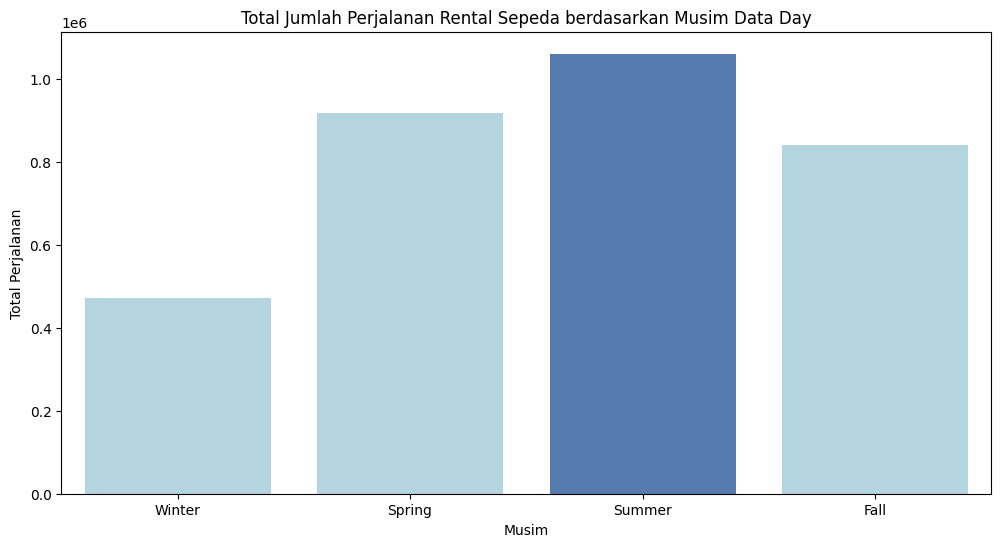

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df,
    palette=['lightblue', 'lightblue','#4877be', 'lightblue'],
    estimator=sum,
    ci=None
)

plt.xlabel('Musim')
plt.ylabel('Total Perjalanan')
plt.title('Total Jumlah Perjalanan Rental Sepeda berdasarkan Musim Data Day')

plt.show()


<ipython-input-34-2e4eb691997a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-34-2e4eb691997a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/l

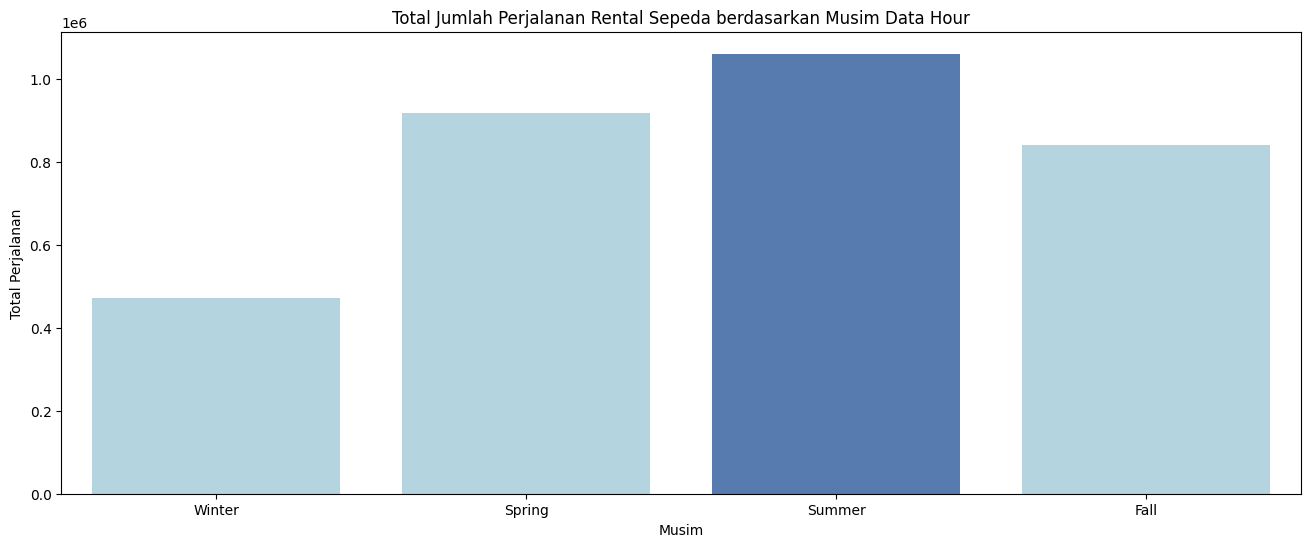

In [34]:
plt.figure(figsize=(16, 6))
sns.barplot(
    x='season',
    y='cnt',
    data=hour_df,
    palette=['lightblue', 'lightblue','#4877be', 'lightblue'],
    estimator=sum,
    ci=None
)

plt.xlabel('Musim')
plt.ylabel('Total Perjalanan')
plt.title('Total Jumlah Perjalanan Rental Sepeda berdasarkan Musim Data Hour')

plt.show()

Disini saya ingin mengelompokan weekday terhadap cnt untuk melihat hari apa pengguna sepeda terbanyak untuk menjawab pertanyaan 2

In [35]:
day_df.groupby(by='weekday').cnt.nunique().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Friday,104
1,Monday,104
2,Sunday,104
3,Tuesday,104
4,Thursday,103
5,Wednesday,103
6,Saturday,102


In [36]:
hour_df.groupby(by='weekday').cnt.nunique().sort_values(ascending=False).reset_index()

,weekday,cnt
0,Wednesday,616
1,Saturday,609
2,Thursday,606
3,Tuesday,598
4,Monday,595
5,Friday,584
6,Sunday,571


Disini saya mencoba visualisasi data weekday terhadap cnt

<ipython-input-37-60500a7689c5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-37-60500a7689c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/l

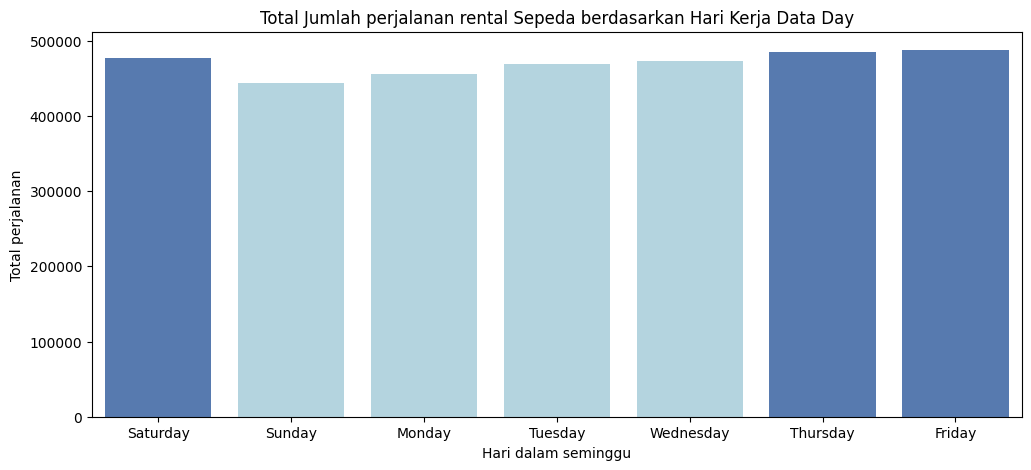

In [37]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    palette=['#4877be','lightblue', 'lightblue', 'lightblue','lightblue','#4877be','#4877be'],
    estimator=sum,
    ci=None
)

plt.xlabel('Hari dalam seminggu')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Hari Kerja Data Day')

plt.show()

<ipython-input-38-08cac9af7416>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-38-08cac9af7416>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/l

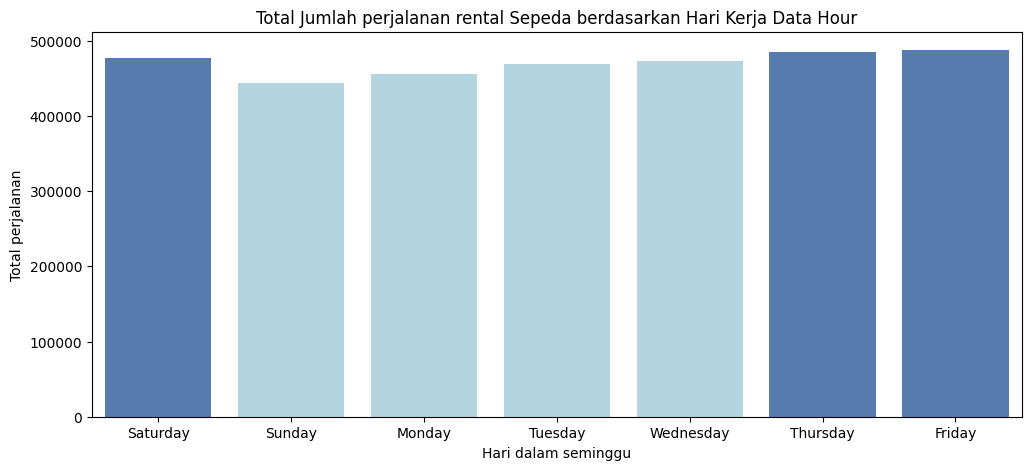

In [38]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x='weekday',
    y='cnt',
    data=hour_df,
    palette=['#4877be','lightblue', 'lightblue', 'lightblue','lightblue','#4877be','#4877be'],
    estimator=sum,
    ci=None
)

plt.xlabel('Hari dalam seminggu')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Hari Kerja Data Hour')

plt.show()

Disini saya mengelompokan seberapa banyak pengguna sepeda pada working day dan sebaliknya

In [39]:
day_df.groupby(by='workingday').cnt.nunique().sort_values(ascending=False).reset_index()

,workingday,cnt
0,1,487
1,0,223


In [40]:
hour_df.groupby(by='workingday').cnt.nunique().sort_values(ascending=False).reset_index()

,workingday,cnt
0,1,856
1,0,676


disni saya coba visualisasi dengan barplot

<ipython-input-41-c2630280c5db>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-41-c2630280c5db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


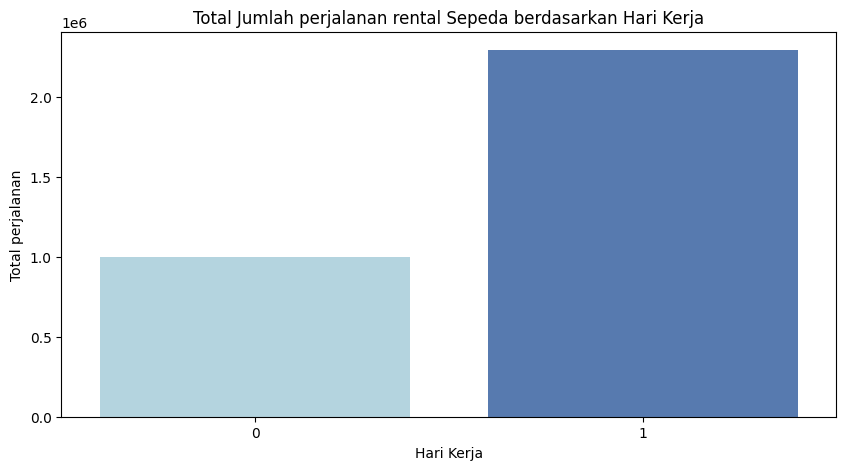

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df,
    palette=['lightblue','#4877be'],
    estimator=sum,
    ci=None
)

plt.xlabel('Hari Kerja')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Hari Kerja')

plt.show()

<ipython-input-42-df2247b7ed44>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-42-df2247b7ed44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


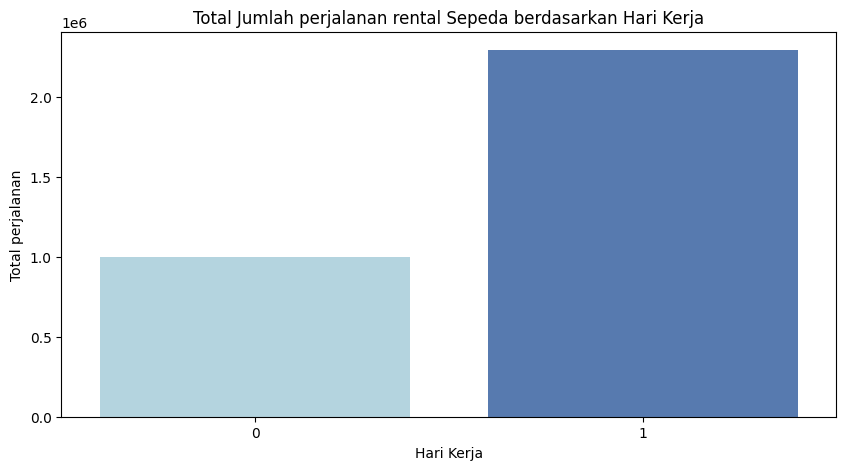

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='workingday',
    y='cnt',
    data=hour_df,
    palette=['lightblue','#4877be'],
    estimator=sum,
    ci=None
)

plt.xlabel('Hari Kerja')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Hari Kerja')

plt.show()

Saya ingin Membuat pengelompokan berdasarkan var holiday 1== holiday

In [43]:
day_df.groupby(by='holiday').cnt.nunique().sort_values(ascending=False).reset_index()

,holiday,cnt
0,0,679
1,1,20


In [44]:
hour_df.groupby(by='holiday').cnt.nunique().sort_values(ascending=False).reset_index()

,holiday,cnt
0,0,869
1,1,276


menambahkan visualisasi

<ipython-input-45-724817d07a5d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-45-724817d07a5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


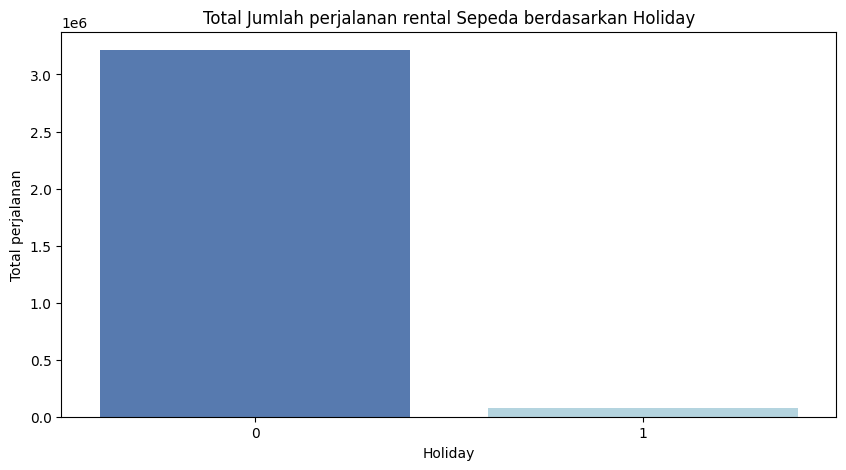

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='holiday',
    y='cnt',
    data=day_df,
    palette=['#4877be','lightblue'],
    estimator=sum,
    ci=None
)

plt.xlabel('Holiday')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Holiday')

plt.show()

<ipython-input-46-b721e28e1920>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-46-b721e28e1920>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


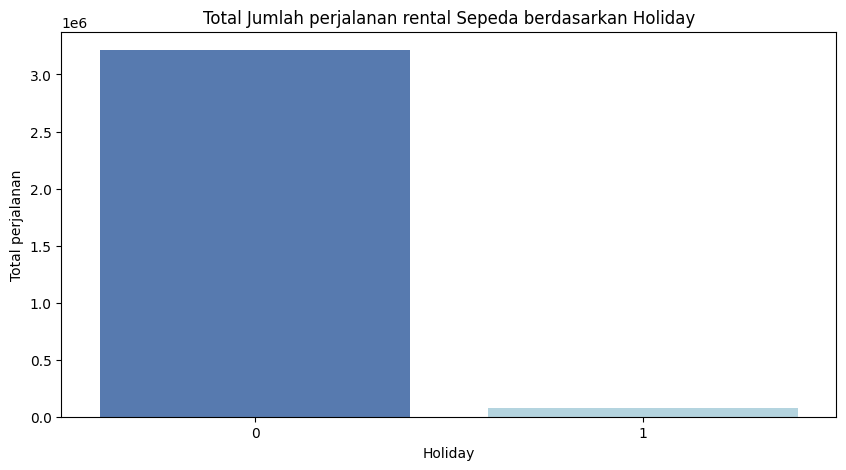

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='holiday',
    y='cnt',
    data=hour_df,
    palette=['#4877be','lightblue'],
    estimator=sum,
    ci=None
)

plt.xlabel('Holiday')
plt.ylabel('Total perjalanan')
plt.title('Total Jumlah perjalanan rental Sepeda berdasarkan Holiday')

plt.show()

disini saya ingin mencoba mengelompokkan jam tersibuk pada weekday

In [47]:
hour_df.groupby(by=['hr','weekday']).cnt.nunique().sort_values(ascending=False).reset_index()

,hr,weekday,cnt
0,16,Sunday,102
1,18,Thursday,102
2,14,Sunday,101
3,17,Monday,101
4,8,Wednesday,101
...,...,...,...
163,4,Friday,14
164,4,Wednesday,13
165,3,Wednesday,13
166,3,Tuesday,12


membuat visualisasi dengan weekday hr dan cnt

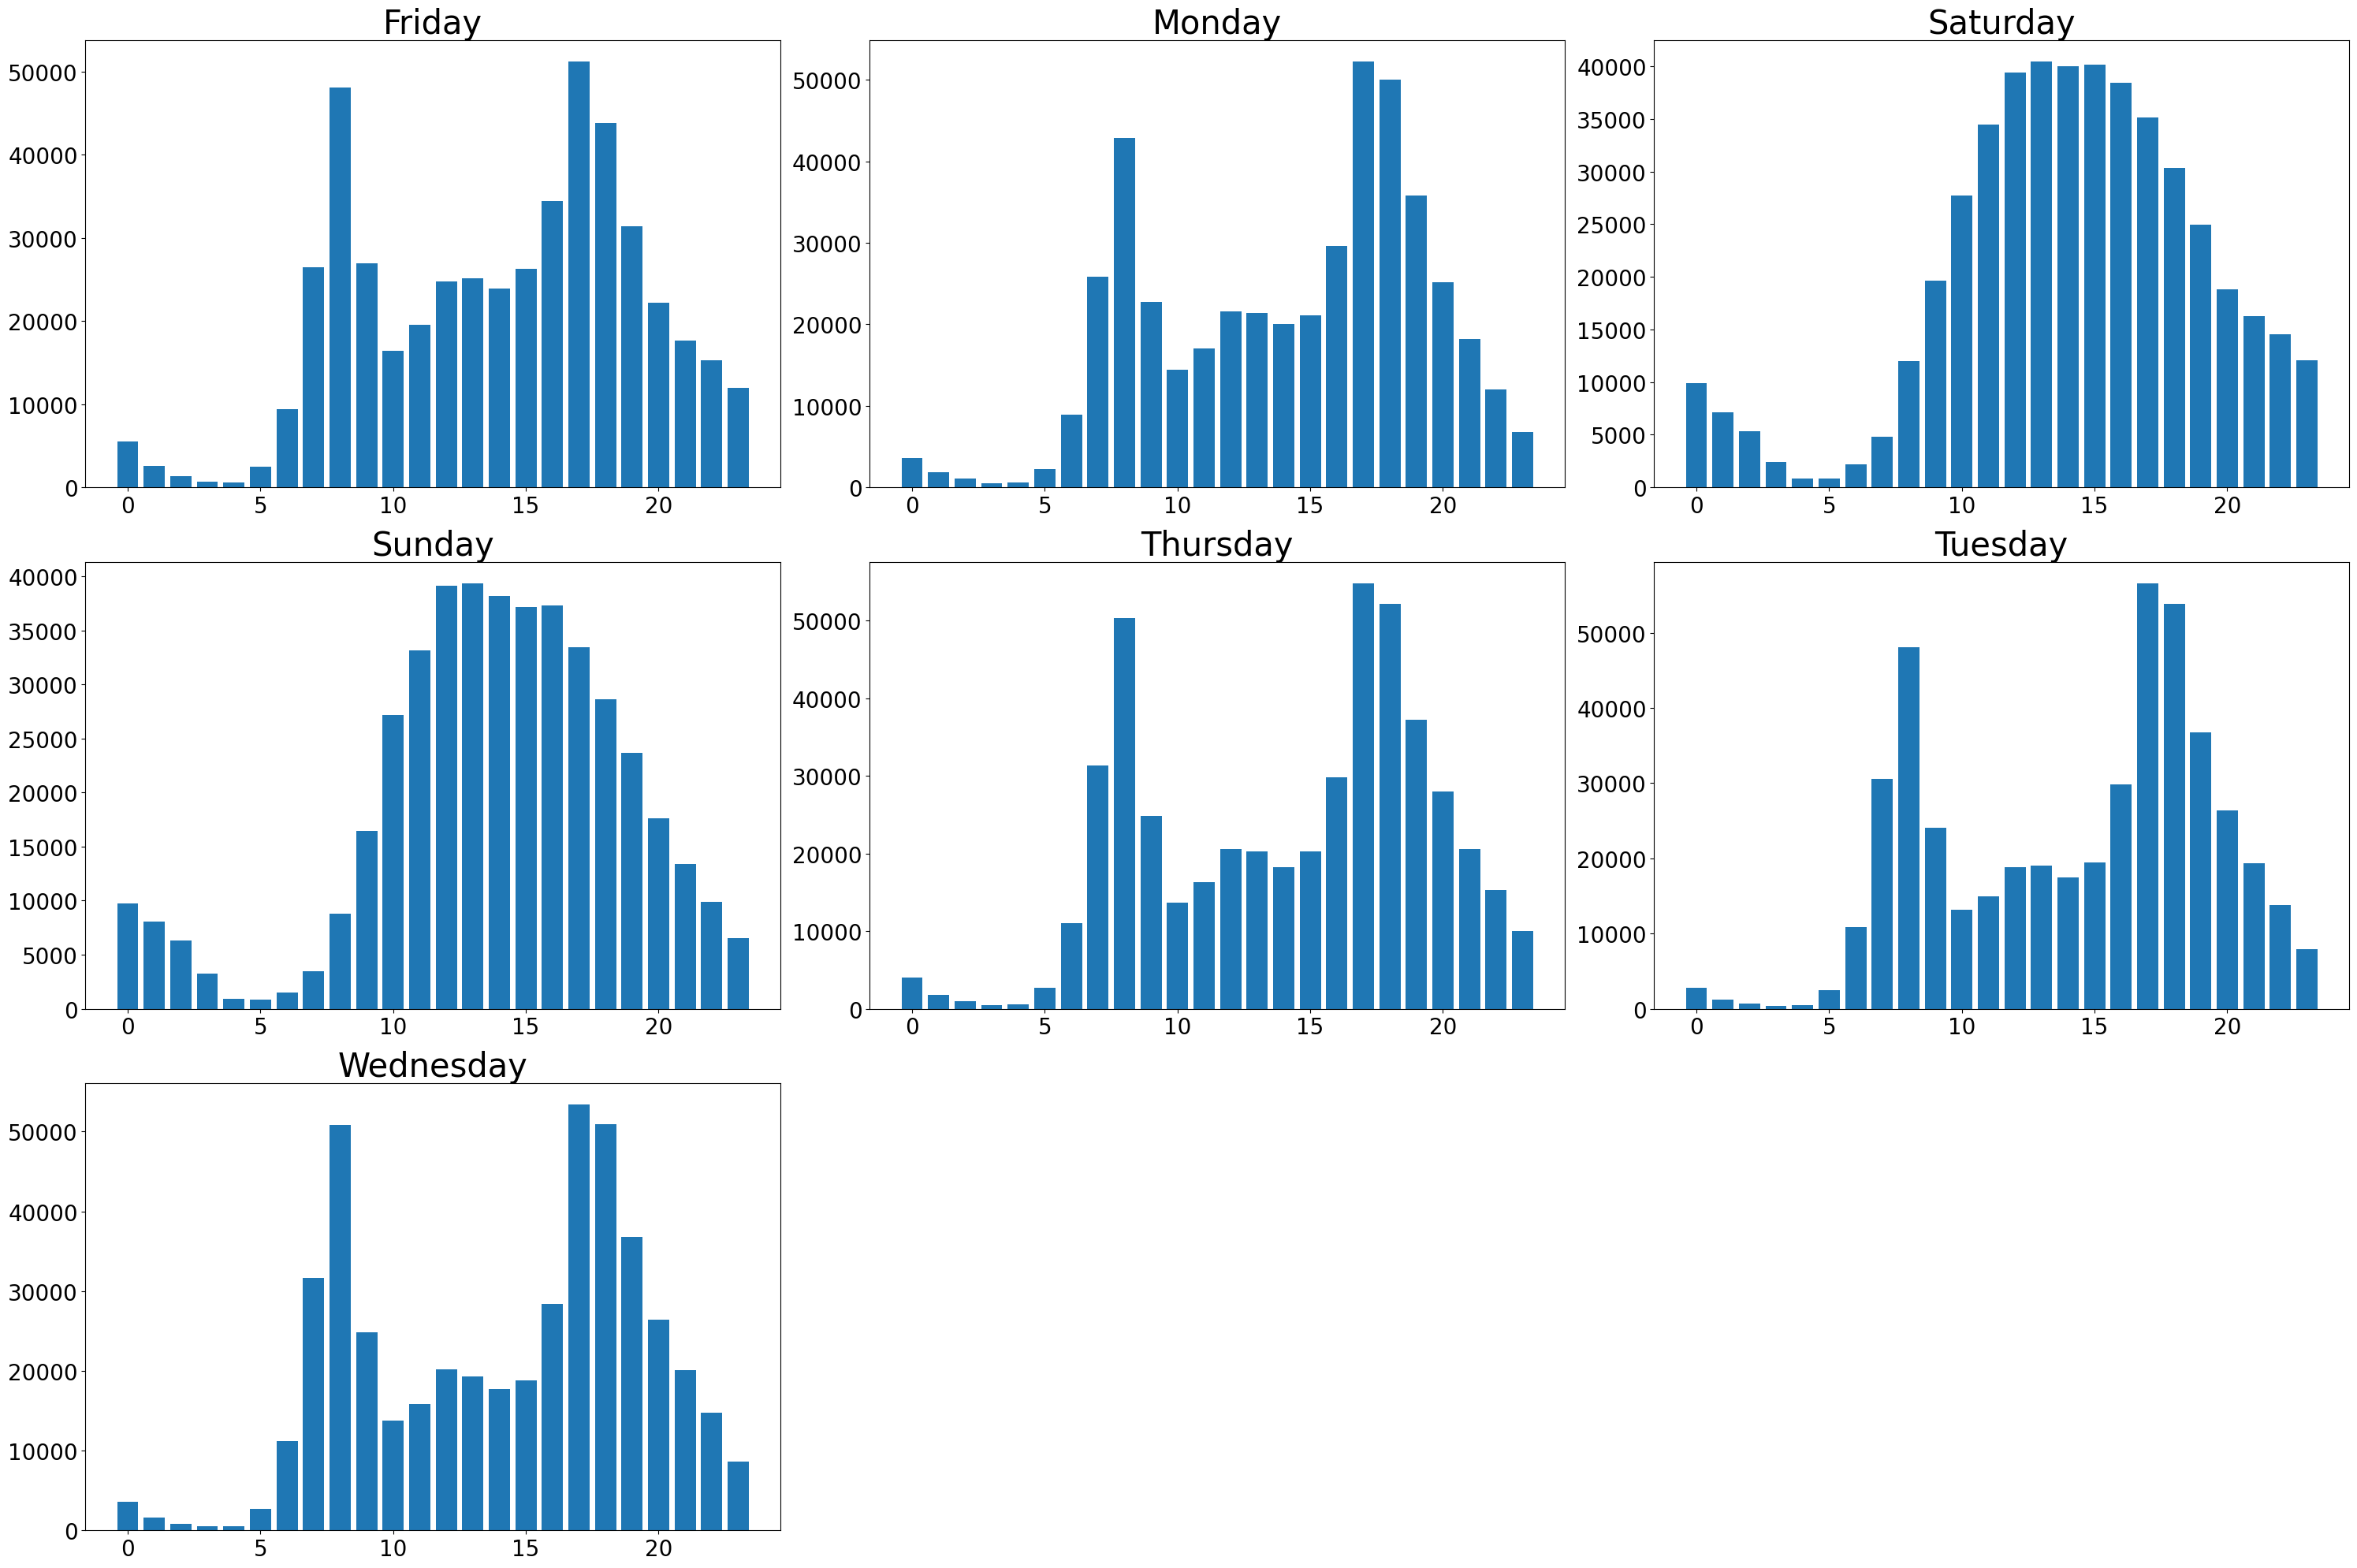

In [48]:
fig, ax = plt.subplots(3, 3, figsize=(30, 20))

for i, day in enumerate(np.unique(hour_df['weekday'])):
    data = hour_df[hour_df['weekday'] == day]
    count = np.zeros(24)
    hr_count = data.groupby('hr')['cnt'].sum()
    count[hr_count.index] = hr_count.values

    row = i // 3
    col = i % 3

    if row < ax.shape[0] and col < ax.shape[1]:
        ax[row, col].bar(range(0, 24), count)
        ax[row, col].tick_params(axis='both', labelsize=20)
        ax[row, col].set_title(day, fontsize=30)

if len(np.unique(hour_df['weekday'])) < 9:
  fig.delaxes(ax[2, 2])
  fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

pengguna rental sepeda cenderung right skewed

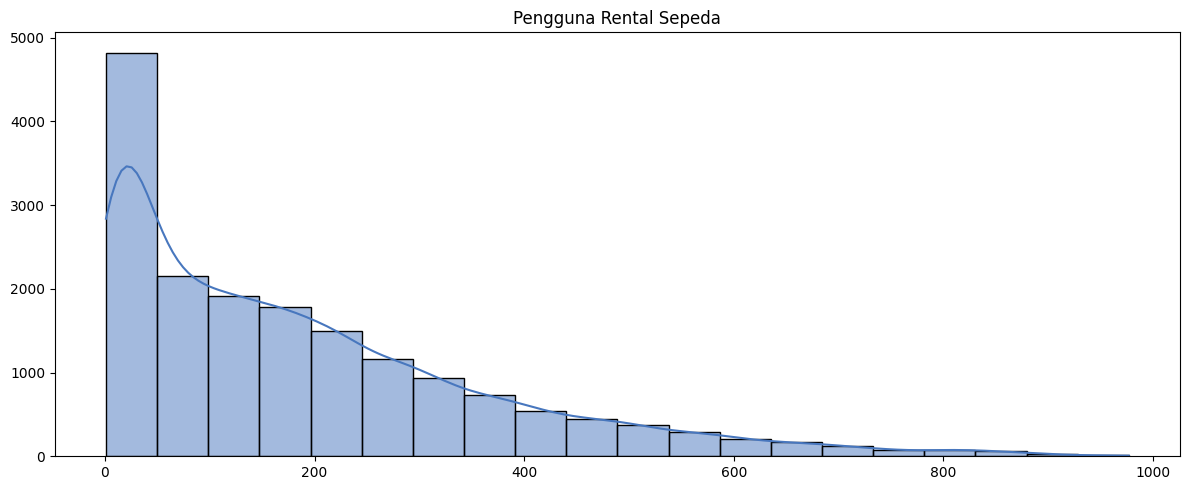

In [49]:
fig, ax = plt.subplots(1, figsize=(12, 5))

sns.histplot(hour_df['cnt'], kde=True, bins=20, ax=ax, color='#4877be')
ax.set_title("Pengguna Rental Sepeda")
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.tight_layout()

plt.show()

<ipython-input-50-f24bf223a350>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['registered', 'casual'], y=[register_sum, casual_sum],  palette=['#4877be', 'lightblue'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


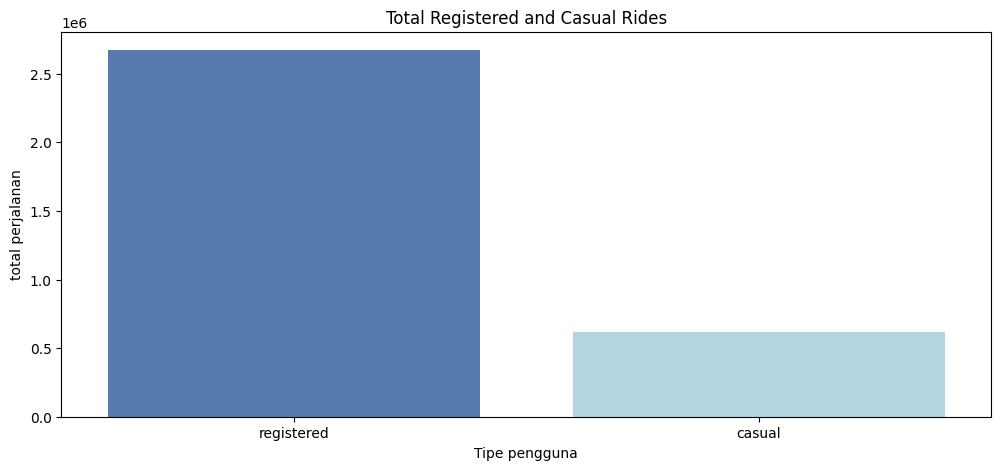

In [50]:
register_sum = hour_df['registered'].sum()
casual_sum = hour_df['casual'].sum()

plt.figure(figsize=(12,5))
sns.barplot(x=['registered', 'casual'], y=[register_sum, casual_sum],  palette=['#4877be', 'lightblue'])

plt.xlabel("Tipe pengguna")
plt.ylabel("total perjalanan")
plt.title("Total Registered and Casual Rides")

plt.show()

mengelompokan suhu dll

In [51]:
nature_var = ['temp', 'atemp', 'hum', 'windspeed']
day_df[nature_var].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576
std,7.505091,8.148059,14.242910,5.192357
min,2.424346,3.953480,0.000000,1.500244
25%,13.820424,16.892125,52.000000,9.041650
50%,20.431653,24.336650,62.666700,12.125325
75%,26.872076,30.430100,73.020850,15.625371
max,35.328347,42.044800,97.250000,34.000021


untuk anomali pada windspeed itu karena hanya ada beberapa angin diatas 25 mph tapi itu bisa saja terjadi ini bisa diabaikan

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


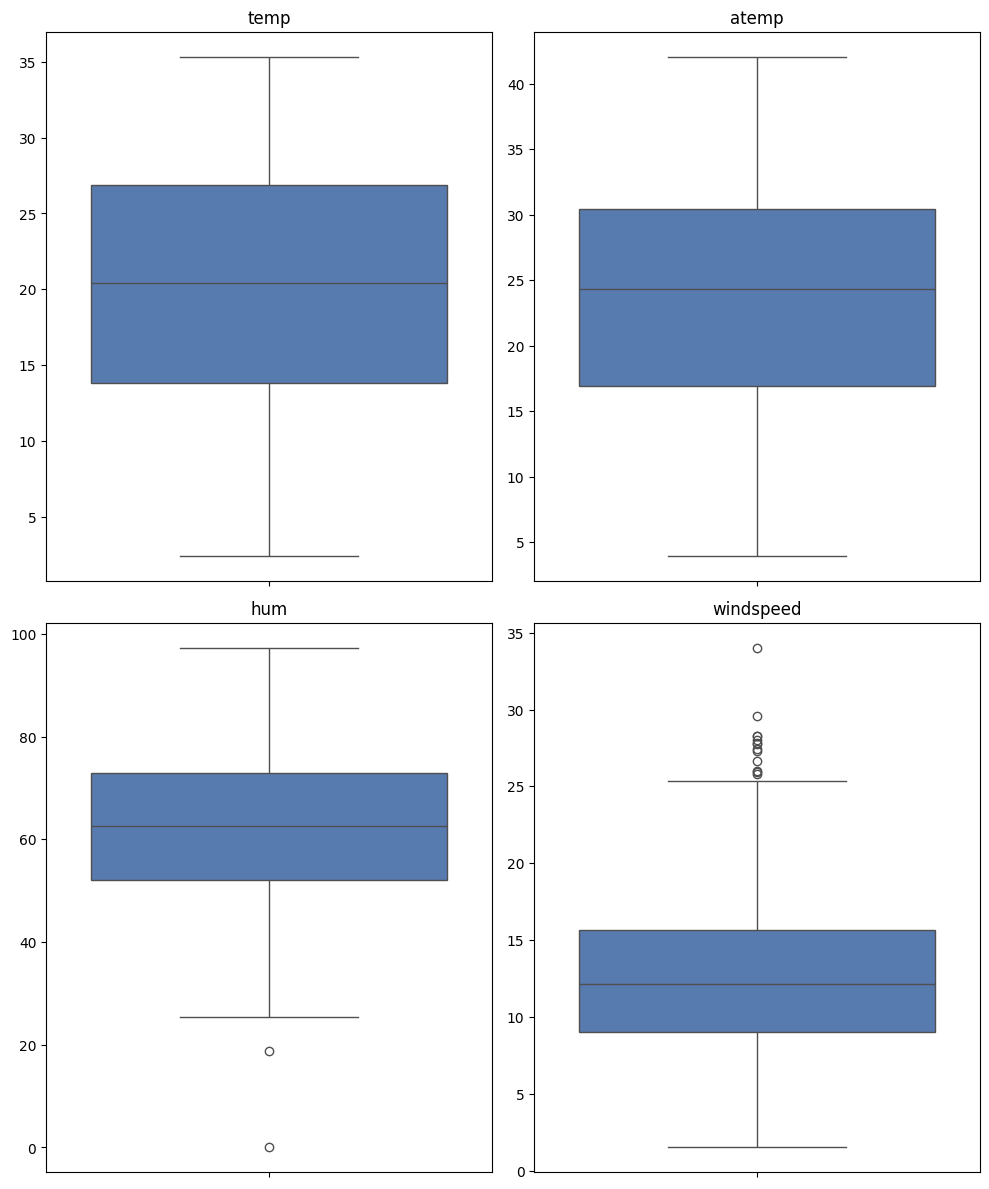

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12))
df_float = day_df[nature_var]

for i in range(2):
    for j in range(2):
        sns.boxplot(y=df_float[nature_var[i*2 + j]],ax=axs[i, j], color='#4877be')

        axs[i, j].set_title(nature_var[i*2 + j])
        axs[i, j].set_ylabel("")

plt.tight_layout()
plt.show()

**Insight:**
- Pertama musim dengan perjalanan terbanyak adalah summer
- Perjalanan terbanyak pada weekday ada di saturday thursday dan friday
- Hari kerja lebih banyak daripada bukan hari kerja sedangkan holiday hanya sdikit perjalanan
-  Rata rata perjalanan ada di jam 5-20 pada weekday
- Lebih banyak pengguna registered dibandingkan casual


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca memengaruhi permintaan rental sepeda?

In [53]:
weather_df = hour_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

weather_df

,weathersit,casual,registered,cnt
0,Clear,462745,1875428,2338173
1,Heavy rain/snow,8,215,223
2,Light snow/rain,22783,135548,158331
3,Mist,134481,661471,795952


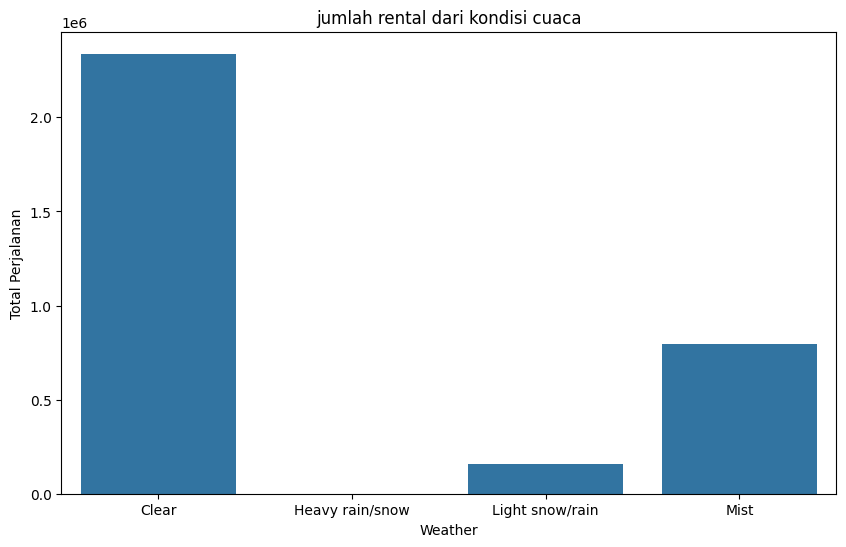

In [54]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="weathersit",
    y="cnt",
    data=weather_df)

plt.xlabel("Weather")
plt.ylabel("Total Perjalanan")
plt.title("jumlah rental dari kondisi cuaca")
plt.show()

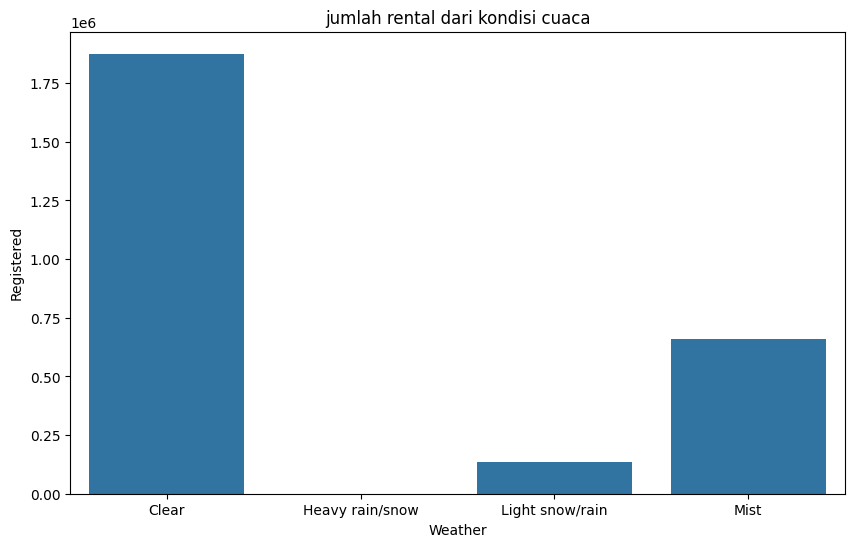

In [55]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="weathersit",
    y="registered",
    data=weather_df)

plt.xlabel("Weather")
plt.ylabel("Registered")
plt.title("jumlah rental dari kondisi cuaca")
plt.show()

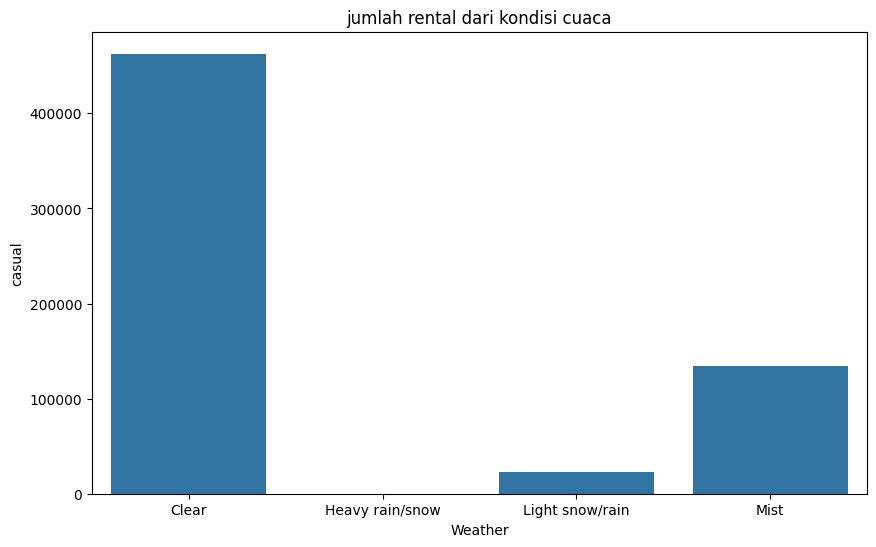

In [56]:
plt.figure(figsize=(10,6))

sns.barplot(
    x="weathersit",
    y="casual",
    data=weather_df)

plt.xlabel("Weather")
plt.ylabel("casual")
plt.title("jumlah rental dari kondisi cuaca")
plt.show()

### Pertanyaan 2: Bagaimana tren pengguna sepeda pada saat hari kerja?

In [57]:
weekday_tren_df = hour_df.resample(rule='D', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_tren_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-01,331,654,985
2011-01-02,131,670,801
2011-01-03,120,1229,1349


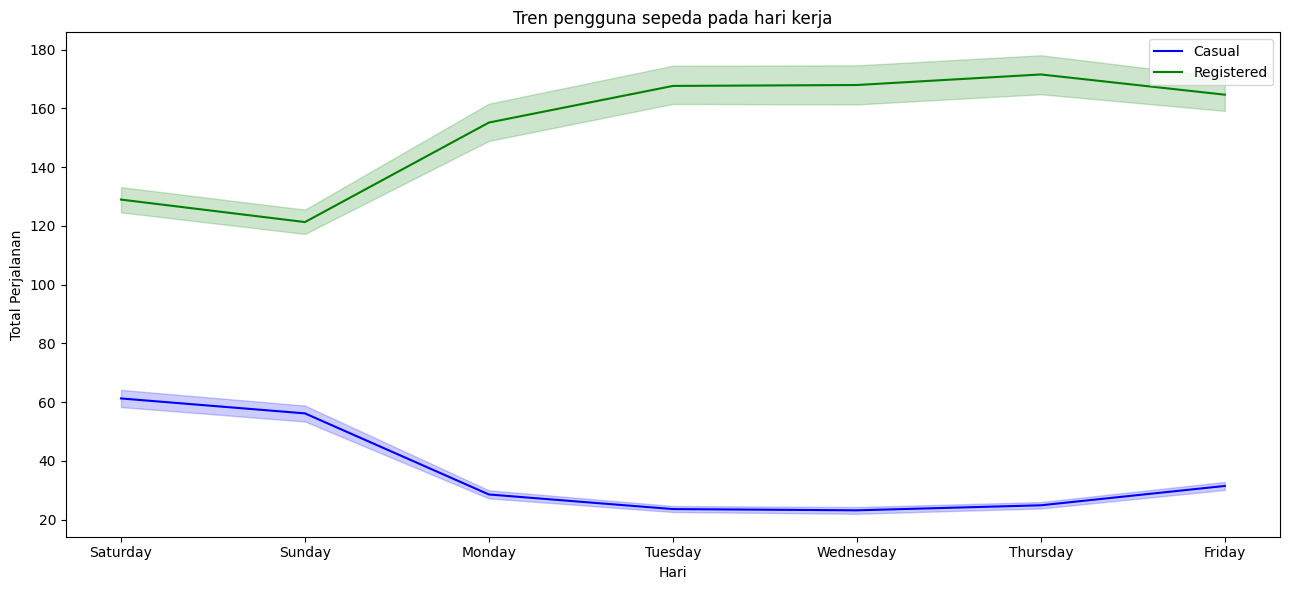

In [58]:
plt.figure(figsize=(13,6))

sns.lineplot(
             x="weekday",
             y="casual",
             data=hour_df,
             color='blue',
             label='Casual'
)
sns.lineplot(
             x="weekday",
             y="registered",
             data=hour_df,
             color='green',
             label='Registered'
)
plt.xlabel("Hari")
plt.ylabel("Total Perjalanan")
plt.title("Tren pengguna sepeda pada hari kerja")
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 3: Pada jam berapakah kebutuhan pengguna rental sepeda paling tinggi pada hari kerja?

In [59]:
hour_tren_df = hour_df.groupby(['hr', 'weekday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

hour_tren_df.head(3)

,hr,weekday,casual,registered,cnt
0,0,Friday,962,4491,5453
1,0,Monday,989,2582,3571
2,0,Saturday,1629,8273,9902


<ipython-input-60-6f7c482075be>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silenc

[Text(0.5, 1.0, 'total perjalanan pada weekday '),
 Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'total perjalanan')]

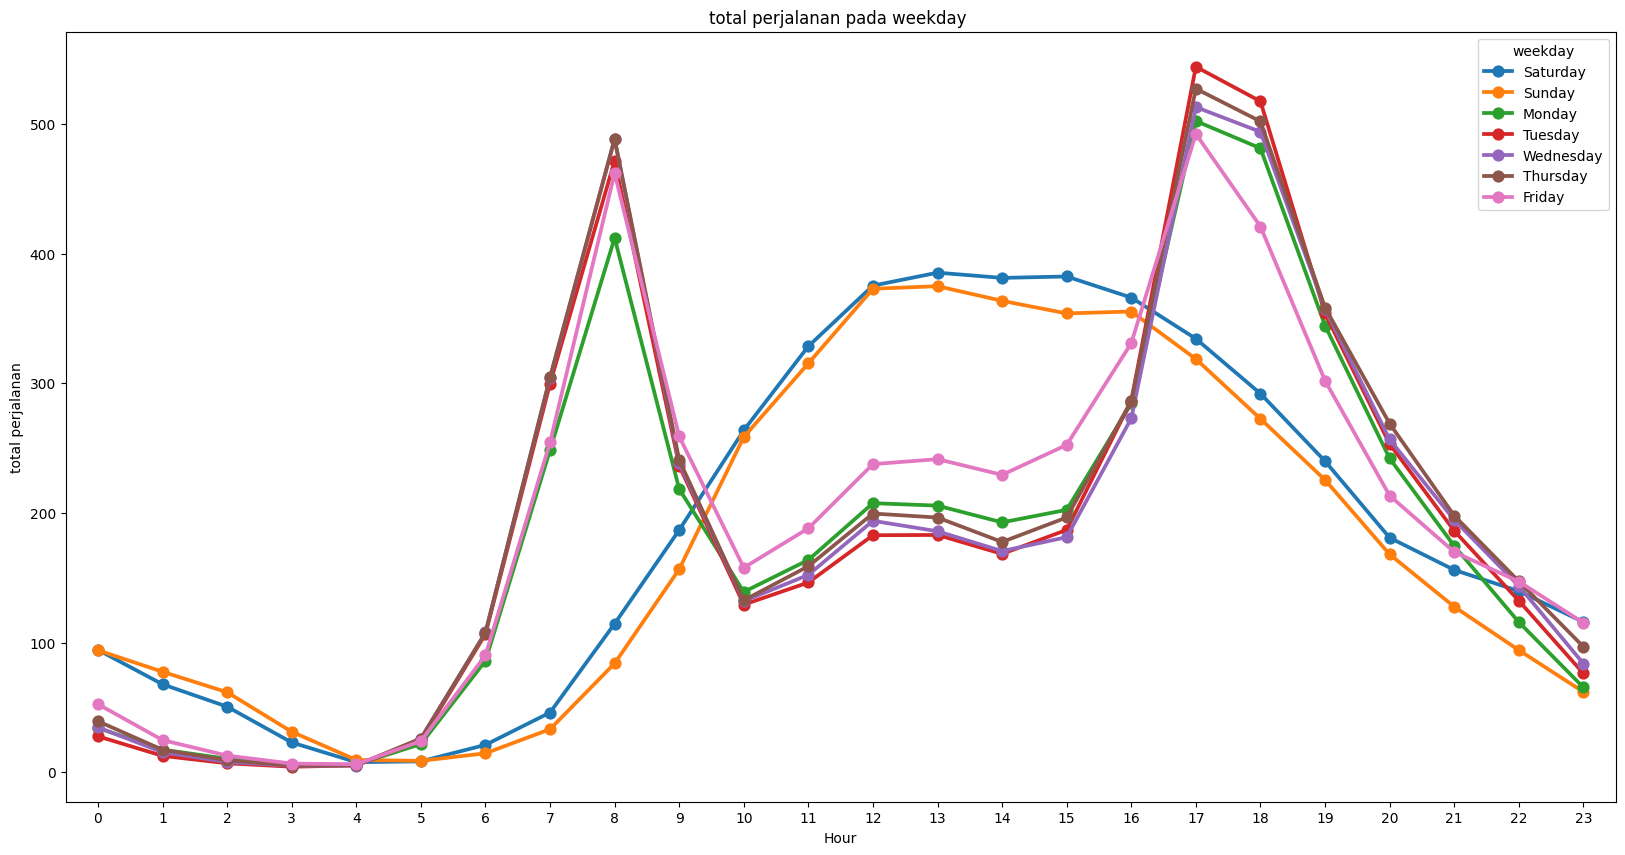

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.pointplot(
    data=hour_df,
    x='hr',
    y='cnt',
    hue='weekday',
    ax=ax,
    ci=None
)
ax.set(
    title='total perjalanan pada weekday ',
    xlabel='Hour',
    ylabel='total perjalanan')

<ipython-input-61-d49d690b2c7b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silenc

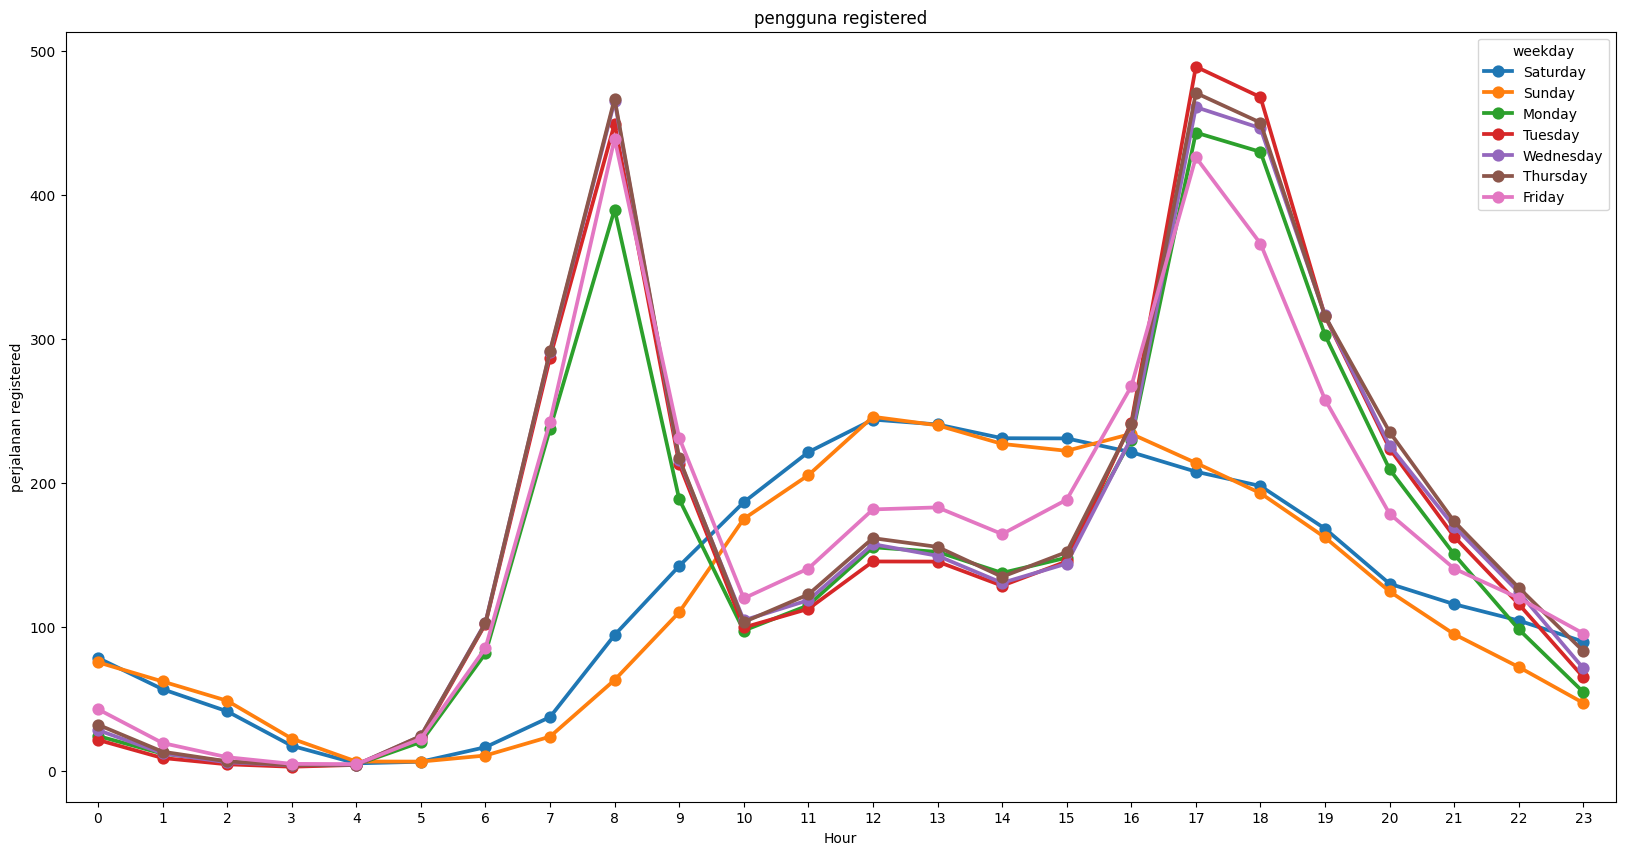

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(
    data=hour_df,
    x='hr',
    y='registered',
    hue='weekday',
    ax=ax,
    ci=None
)
ax.set(title='pengguna registered', xlabel='Hour', ylabel='perjalanan registered')
plt.show()

<ipython-input-62-678e8ac1af76>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silenc

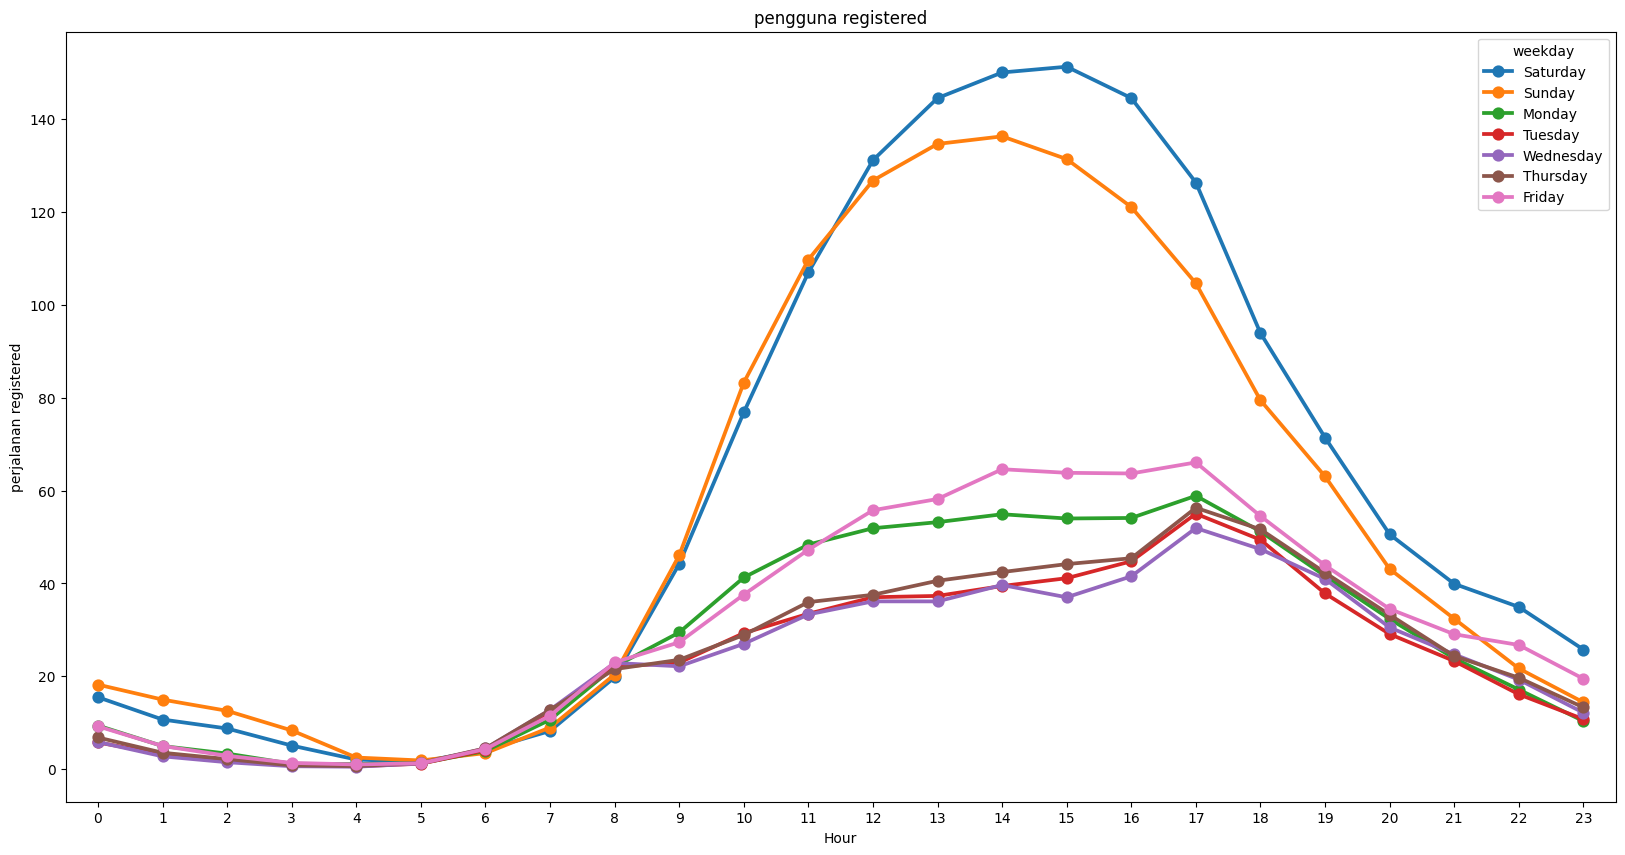

In [62]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(
    data=hour_df,
    x='hr',
    y='casual',
    hue='weekday',
    ax=ax,
    ci=None
)
ax.set(title='pengguna registered', xlabel='Hour', ylabel='perjalanan registered')
plt.show()

**Insight:**
- Pertama berdasarkan jumlah rental disini terlihat bahwa cuaca clear itu lebih diminati disusul oleh mist dan light snow/rain sedangkan pada heavy rain/snow hanya sedikit sekali.
disini perusahaan dapat mengurangi jumlah sepeda pada light snow/rain dan perusahaan bisa menambah jumlah sepeda pada saat cuaca clear
- Kedua berdasarkan pada lineplot total perjalanan lebih banyak pada pengguna sepeda yang registered sedangkan casual berada dibawahnya dan dapat dilihat ada penurunan rental sepeda pada sunday
- Ketiga disini untuk total perjalanan pada weekday tueday yang dimana permintaan perentalan paling tinggi pada jam 17 sedangkan yang terendah ada pada 3 sampai 4 kecuali saturday dan sunday
- Keempat pengguna casual lebih banyak di saturday and sunday sedangkan registered hampir sama dengan lineplot total perjalanan

## Conclusion

- Conclution pertanyaan 1


1. Karena menurut data cuaca clear lebih banyak pengguna sepeda. pengusaha rental dapat menambah armada sepeda pada saat cuaca cerah dan mengurangi armada pada saat cuaca sedang light snow atau rain

- Conclution pertanyaan 2

1.   dapat dilihat pada lineplot tren pengguna lebih banyak pada hari kerja dengan monday lebih rendah sedangkan pada casual terjadi penurunan pada hari kerja,pengguna registered terdapat jumlah total perjalanan lebih banyak dibanding casual maka dari itu pengusaha sepeda harus membuat penawaran seperti diskon untuk registered diawal rental sepeda


- Conclution pertanyaan 3

1.   pada jam 5 sampai jam 8 dan 16 sampai 18 terjadi kenaikan yang signifikan maka kecuali pada saturday dan sunday,pengusaha rental sepeda dapat menambah armada pada jam tersebut
2.   untuk pengguna casual hanya tinggi pada hari saturday dan sunday itu mungkin dikarenakan pada hari tersebut banyak orang yang hanya ingin bermain sesekali saja pengusaha rental dapat menaikan jumlah pelanggan casual untuk mendongkrak angka pengguna seperti kampanye saturday sunday sehat berspeda dll